# <h1 align="center"> © RsydMathTech. <h1/>

# <span style="color:lightgreen; font-size:18px;">Simple Linear Regression - Multiple Linear Regression (Evaluation Model)</span>

# Regression Model Evaluation

## 1. Regression Plot
**Konsep:**  
Visualisasi hubungan antara **X (feature)** dengan **y (target)** menggunakan garis regresi.  

**Fungsi:**  
- Menunjukkan arah hubungan (positif/negatif).  
- Menilai apakah data cocok dengan model linear.  

**Interpretasi:**  
- Titik data rapat di sekitar garis → model linear cocok.  
- Titik data menyebar jauh dari garis → model kurang baik.  

---

## 2. Residual Plot
**Konsep:**  
Residual = selisih antara nilai aktual dan nilai prediksi ($ y - \hat{y} $).  

**Fungsi:**  
- Mengecek apakah asumsi linear valid.  
- Residual sebaiknya acak di sekitar 0 tanpa pola tertentu.  

**Interpretasi:**  
- Residual menyebar acak → model linear valid.  
- Ada pola lengkung → model linear tidak cocok (mungkin perlu polynomial).  
- Variansi residual tidak sama → indikasi heteroskedastisitas.  

---

## 3. Distribution Plot
**Konsep:**  
Membandingkan distribusi **nilai aktual** dengan **nilai prediksi**.  

**Fungsi:**  
- Mengukur seberapa dekat hasil prediksi dengan data asli.  
- Cocok digunakan untuk **MLR** dengan banyak variabel.  

**Interpretasi:**  
- Kurva distribusi prediksi mirip dengan aktual → model bagus.  
- Kurva berbeda jauh → model perlu diperbaiki.  

---

## 4. Evaluation Metrics
**MSE (Mean Squared Error):**  
- Rata-rata kuadrat error.  
- Makin kecil → makin baik.  

**R² (Coefficient of Determination):**  
- Proporsi variasi target yang dijelaskan oleh model.  
- Nilai antara 0–1, makin dekat ke 1 → makin baik.  

---

## 5. Intinya
- **Regression Plot** → cek hubungan X–y.  
- **Residual Plot** → validasi asumsi linear.  
- **Distribution Plot** → bandingkan actual vs predicted.  
- **MSE & R²** → ukur performa model secara kuantitatif.  
- Jika residual tidak random → perlu **Non-Linear Regression**.  


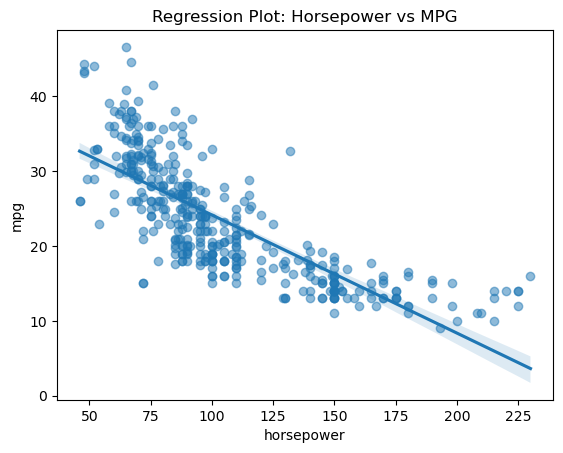

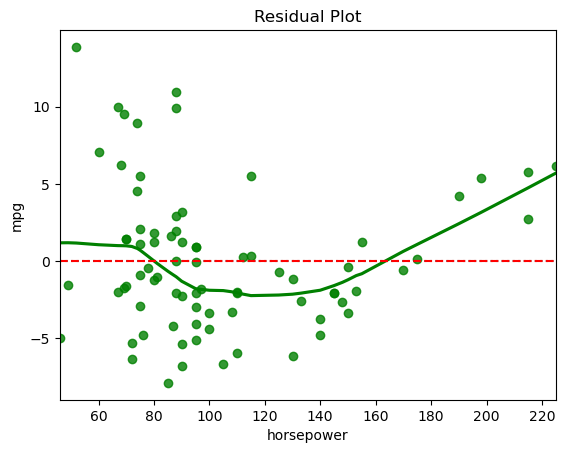

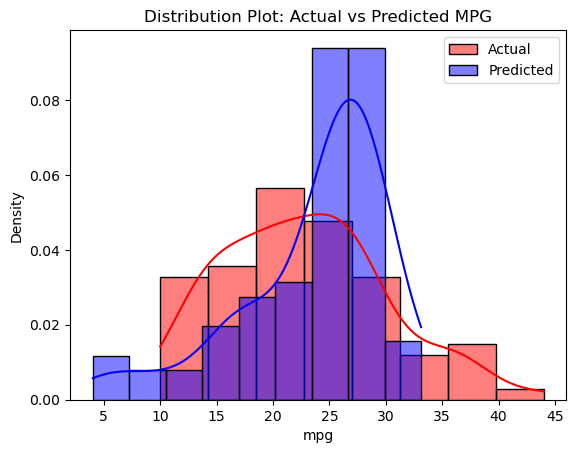

Model Evaluation:
MSE = 22.15
R²  = 0.57


In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = sns.load_dataset("mpg").dropna()

# Feature (X) and target (y)
X = df[["horsepower"]]
y = df["mpg"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Prediction
yhat = lm.predict(X_test)

# --- 1. Regression Plot ---
sns.regplot(x="horsepower", y="mpg", data=df, scatter_kws={"alpha":0.5})
plt.title("Regression Plot: Horsepower vs MPG")
plt.show()

# --- 2. Residual Plot ---
sns.residplot(x=X_test.squeeze(), y=y_test - yhat, lowess=True, color="g")
plt.axhline(0, color="r", linestyle="--")
plt.title("Residual Plot")
plt.show()

# --- 3. Distribution Plot (Actual vs Predicted) ---
sns.histplot(y_test, color="r", label="Actual", kde=True, stat="density")
sns.histplot(yhat, color="b", label="Predicted", kde=True, stat="density")
plt.legend()
plt.title("Distribution Plot: Actual vs Predicted MPG")
plt.show()

# --- 4. Evaluation Metrics ---
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print("Model Evaluation:")
print(f"MSE = {mse:.2f}")
print(f"R²  = {r2:.2f}")


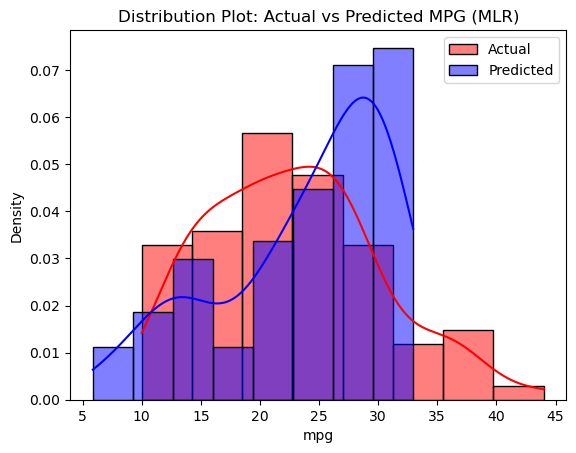

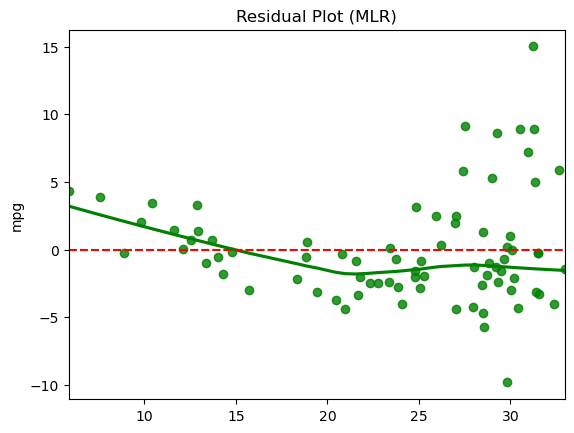

Multiple Linear Regression Evaluation:
MSE = 18.01
R²  = 0.65


In [2]:
# Features (multiple) and target
X = df[["horsepower", "weight", "displacement"]]
y = df["mpg"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Prediction
yhat_mlr = mlr.predict(X_test)

# --- 1. Distribution Plot (Actual vs Predicted) ---
sns.histplot(y_test, color="r", label="Actual", kde=True, stat="density")
sns.histplot(yhat_mlr, color="b", label="Predicted", kde=True, stat="density")
plt.legend()
plt.title("Distribution Plot: Actual vs Predicted MPG (MLR)")
plt.show()

# --- 2. Residual Plot ---
sns.residplot(x=yhat_mlr, y=y_test - yhat_mlr, lowess=True, color="g")
plt.axhline(0, color="r", linestyle="--")
plt.title("Residual Plot (MLR)")
plt.show()

# --- 3. Evaluation Metrics ---
mse_mlr = mean_squared_error(y_test, yhat_mlr)
r2_mlr = r2_score(y_test, yhat_mlr)

print("Multiple Linear Regression Evaluation:")
print(f"MSE = {mse_mlr:.2f}")
print(f"R²  = {r2_mlr:.2f}")
